In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipdb
import os
import bda_utils

In [3]:
config_df = pd.read_csv('./runs/config_df_70_569.csv', index_col=0)
config_df.columns = ['run', 'detector', 'mu', 't_pre']
config_df

,run,detector,mu,t_pre
0,70,0,0.0,3
1,71,0,0.0,4
2,72,0,0.0,5
3,73,0,0.0,6
4,74,0,0.0,7
...,...,...,...,...
495,565,9,0.9,3
496,566,9,0.9,4
497,567,9,0.9,5
498,568,9,0.9,6


# 对于每个detector

In [8]:
det = 0
data_det = config_df.loc[config_df['detector']==det]
data_det

,run,detector,mu,t_pre
0,70,0,0.0,3
1,71,0,0.0,4
2,72,0,0.0,5
3,73,0,0.0,6
4,74,0,0.0,7
5,75,0,0.1,3
6,76,0,0.1,4
7,77,0,0.1,5
8,78,0,0.1,6
9,79,0,0.1,7


## 关于$\mu$的敏感度分析

In [28]:
def plot_pre(t_pre):
    data_det_pre = data_det.loc[data_det['t_pre']==t_pre]

    s_a = pd.DataFrame([], columns=['mu', 'nrmse', 'mape', 'smape', 'mae'])

    for i in range(len(data_det_pre)):
        folder_name = 'run' + str(data_det_pre.iloc[i, 0])
        mu = data_det_pre.iloc[i, 2]

        g_t_bda = pd.read_csv('./runs/'+folder_name+'/bda_regression_g_t.csv', header=None).to_numpy()
        pred_bda = pd.read_csv('./runs/'+folder_name+'/bda_regression_pred_result.csv', header=None).to_numpy()
        nrmse = bda_utils.nrmse_loss_func(pred_bda, g_t_bda, 0)
        mape = bda_utils.mape_loss_func(pred_bda, g_t_bda, 0)
        smape = bda_utils.smape_loss_func(pred_bda, g_t_bda, 0)
        mae = bda_utils.mae_loss_func(pred_bda, g_t_bda, 0)

        s_a.loc[i, :] = np.array([mu, nrmse, mape, smape, mae])

    s_a[['nrmse', 'mape', 'smape', 'mae']].plot()

<Figure size 432x288 with 0 Axes>

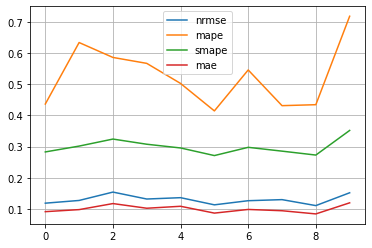

<Figure size 432x288 with 0 Axes>

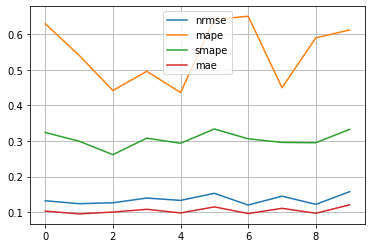

<Figure size 432x288 with 0 Axes>

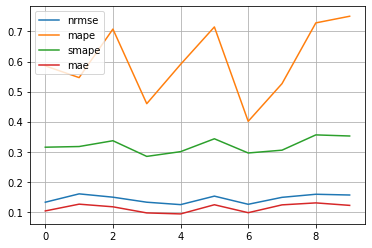

<Figure size 432x288 with 0 Axes>

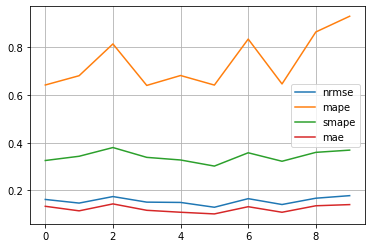

<Figure size 432x288 with 0 Axes>

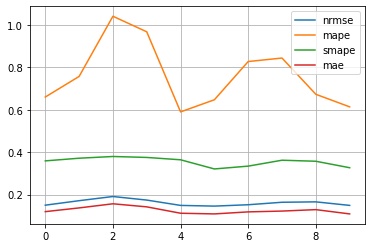

In [81]:
for t_pre in range(3, 8):
    plt.figure()
    plot_pre(t_pre)
    plt.grid()

## 关于往后predict几个label的敏感度分析

### bda model

In [73]:
def plot_mu(mu):
    data_det_mu = data_det.loc[abs(data_det['mu']-mu) < 1e-3]

    s_a = pd.DataFrame([], columns=['t_pre', 'nrmse', 'mape', 'smape', 'mae'])

    for i in range(len(data_det_mu)):
        folder_name = 'run' + str(data_det_mu.iloc[i, 0])
        t_pre = data_det_mu.iloc[i, 3]

        g_t_bda = pd.read_csv('./runs/'+folder_name+'/bda_regression_g_t.csv', header=None).to_numpy()
        pred_bda = pd.read_csv('./runs/'+folder_name+'/bda_regression_pred_result.csv', header=None).to_numpy()
        nrmse = bda_utils.nrmse_loss_func(pred_bda, g_t_bda, 0)
        mape = bda_utils.mape_loss_func(pred_bda, g_t_bda, 0)
        smape = bda_utils.smape_loss_func(pred_bda, g_t_bda, 0)
        mae = bda_utils.mae_loss_func(pred_bda, g_t_bda, 0)

        s_a.loc[i, :] = np.array([t_pre, nrmse, mape, smape, mae])

    s_a[['nrmse', 'mape', 'smape', 'mae']].plot()

<Figure size 432x288 with 0 Axes>

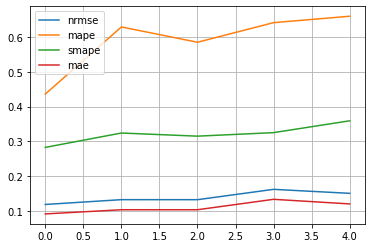

<Figure size 432x288 with 0 Axes>

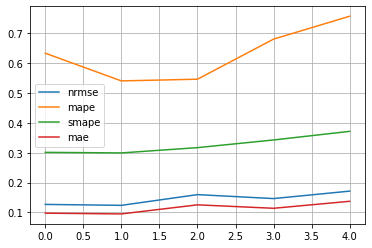

<Figure size 432x288 with 0 Axes>

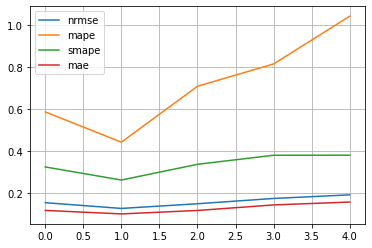

<Figure size 432x288 with 0 Axes>

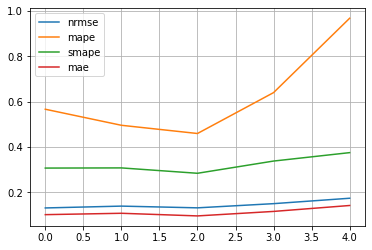

<Figure size 432x288 with 0 Axes>

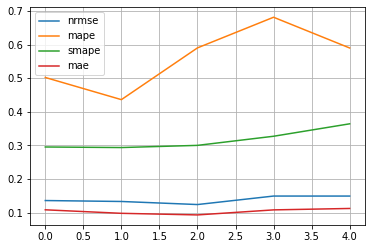

<Figure size 432x288 with 0 Axes>

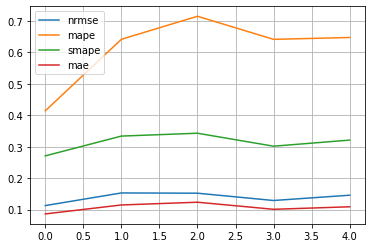

<Figure size 432x288 with 0 Axes>

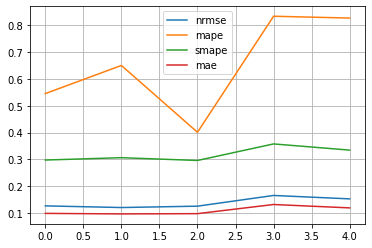

<Figure size 432x288 with 0 Axes>

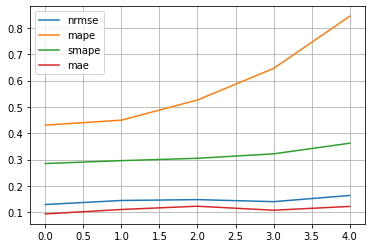

<Figure size 432x288 with 0 Axes>

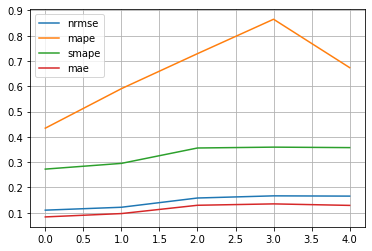

<Figure size 432x288 with 0 Axes>

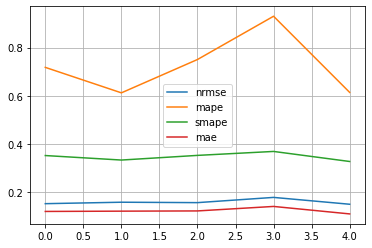

In [80]:
for mu in np.arange(0, 1, 0.1):
    plt.figure()
    plot_mu(mu)
    plt.grid()

### base model

In [66]:
config_df_base = pd.read_csv('./runs_base/config_df_base.csv', index_col=0)
config_df_base

,run,detector,t_pre
0,1,0,3
1,2,0,4
2,3,0,5
3,4,0,6
4,5,0,7
5,6,1,3
6,7,1,4
7,8,1,5
8,9,1,6
9,10,1,7


In [67]:
data_base_det = config_df_base.loc[config_df_base['detector']==det]

C:\Users\10169\Documents\Github\BDA_traffic\bda_utils.py:76: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(eliminate_nan(np.fabs(labels[mask]-preds[mask])/labels[mask]))


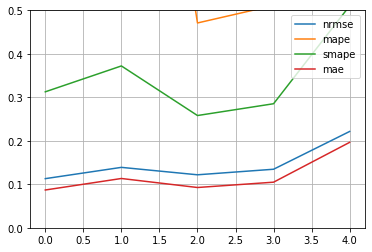

In [78]:

s_a_l_base = pd.DataFrame([], columns=['t_pre', 'nrmse', 'mape', 'smape', 'mae'])

for i in range(len(data_base_det)):
    folder_name = 'run' + str(data_base_det.iloc[i, 0])
    t_pre = data_base_det.iloc[i, 2]
    
    g_t_base = pd.read_csv('./runs_base/'+folder_name+'/base_regression_g_t.csv', header=None).to_numpy()
    pred_base = pd.read_csv('./runs_base/'+folder_name+'/base_regression_pred_result.csv', header=None).to_numpy()
    nrmse = bda_utils.nrmse_loss_func(pred_base, g_t_base, 0)
    mape = bda_utils.mape_loss_func(pred_base, g_t_base, 0)
    smape = bda_utils.smape_loss_func(pred_base, g_t_base, 0)
    mae = bda_utils.mae_loss_func(pred_base, g_t_base, 0)
    
    s_a_l_base.loc[i, :] = np.array([t_pre, nrmse, mape, smape, mae])
    
s_a_l_base[['nrmse', 'mape', 'smape', 'mae']].plot()
plt.ylim(0, 0.5)
plt.grid()

# Analysis

# 关于哪个detector的分析